# Problem Statement
#### Analysing and visualizing the tweets made by Prime Minister of India. One way of communicating the important announcements from the government to people is through tweets. 
    - Analysing the sentiments of people based on the most frequent words used by the Prime Minister in his tweets
    - Analysing the tweets based on likes count
    - Analysing the tweets based on retweets count
    - Analysing the tweets based on replies count
  Plotting the results in Gephi for better visualisation and analysis


# Dataset Description
#### The data set (narendramodi.csv) used for this analysis contains 23 columns. Out of which, we have used columns like date, username, tweet, likes_count for our analysis.
    - date – date in which tweet was posted in the format DD-MM-YY
    - username – username of the account our Prime minister uses to post his tweets
    - tweet – tweets posted by our Prime minister
    - likes_count – number of likes obtained for each of the tweets posted.
   Dataset link: https://www.kaggle.com/reach2ashish/all-narendra-modi-tweets


## Import Library 
    - Importing necessary libraries
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import warnings
# warnings.filterwarnings('ignore')
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Dataset Load
    - Loading MODI.csv from local machine

In [2]:
df = pd.read_csv('narendramodi1.csv')
df.head()

,Tweets
0,Unprecedented enthusiasm in Kolkata! Bond betw...
1,The mood in Siliguri is clear- people want BJP...
2,Happy to be back in Arunachal Pradesh. Watch l...
3,"In Bihar and Odisha, it is NDA all the way. ..."
4,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  19583 non-null  object
dtypes: object(1)
memory usage: 153.1+ KB


# DATASET PREPROCESSING
    - Cleaning the tweets 

In [4]:
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['Tweets'], "@[\w]*")
df.head()

,Tweets,clean_tweet
0,Unprecedented enthusiasm in Kolkata! Bond betw...,Unprecedented enthusiasm in Kolkata! Bond betw...
1,The mood in Siliguri is clear- people want BJP...,The mood in Siliguri is clear- people want BJP...
2,Happy to be back in Arunachal Pradesh. Watch l...,Happy to be back in Arunachal Pradesh. Watch l...
3,"In Bihar and Odisha, it is NDA all the way. ...","In Bihar and Odisha, it is NDA all the way. ..."
4,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...


In [6]:
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Tweets,clean_tweet
0,Unprecedented enthusiasm in Kolkata! Bond betw...,Unprecedented enthusiasm in Kolkata Bond betw...
1,The mood in Siliguri is clear- people want BJP...,The mood in Siliguri is clear people want BJP...
2,Happy to be back in Arunachal Pradesh. Watch l...,Happy to be back in Arunachal Pradesh Watch l...
3,"In Bihar and Odisha, it is NDA all the way. ...",In Bihar and Odisha it is NDA all the way ...
4,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...,...


In [7]:
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Tweets,clean_tweet
0,Unprecedented enthusiasm in Kolkata! Bond betw...,Unprecedented enthusiasm Kolkata Bond between ...
1,The mood in Siliguri is clear- people want BJP...,mood Siliguri clear people want Watch https ps...
2,Happy to be back in Arunachal Pradesh. Watch l...,Happy back Arunachal Pradesh Watch live from P...
3,"In Bihar and Odisha, it is NDA all the way. ...",Bihar Odisha Mahamilawat even option rule endi...
4,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...,


In [8]:
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [Unprecedented, enthusiasm, Kolkata, Bond, bet...
1    [mood, Siliguri, clear, people, want, Watch, h...
2    [Happy, back, Arunachal, Pradesh, Watch, live,...
3    [Bihar, Odisha, Mahamilawat, even, option, rul...
4                                                   []
Name: clean_tweet, dtype: object

In [9]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [unpreced, enthusiasm, kolkata, bond, between,...
1    [mood, siliguri, clear, peopl, want, watch, ht...
2    [happi, back, arunach, pradesh, watch, live, f...
3    [bihar, odisha, mahamilawat, even, option, rul...
4                                                   []
Name: clean_tweet, dtype: object

In [10]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()

,Tweets,clean_tweet
0,Unprecedented enthusiasm in Kolkata! Bond betw...,unpreced enthusiasm kolkata bond between benga...
1,The mood in Siliguri is clear- people want BJP...,mood siliguri clear peopl want watch http pscp...
2,Happy to be back in Arunachal Pradesh. Watch l...,happi back arunach pradesh watch live from pas...
3,"In Bihar and Odisha, it is NDA all the way. ...",bihar odisha mahamilawat even option rule end ...
4,à¤ªà¥à¤¨à¥à¤¹à¤¾ à¤à¤•à¤¦à¤¾ à¤®à¤¹à¤¾à¤°à¤...,


<AxesSubplot:title={'center':'sentiment analysis'}>

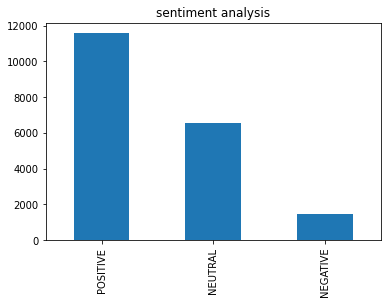

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

from nltk import tokenize
sid = SentimentIntensityAnalyzer()
df['sentiment_compound_polarity']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
df['sentiment_neutral']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
df['sentiment_negative']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
df['sentiment_pos']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_pos']=df.clean_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
df['sentiment_type']=''
df.loc[df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df.loc[df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df.loc[df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [12]:
df.to_csv("modi.csv")

# Exploratory Data Analysis (EDA)
    - Analysing the dataset
    - Visualizing MODI.csv using charts 


## Visualize the frequent words

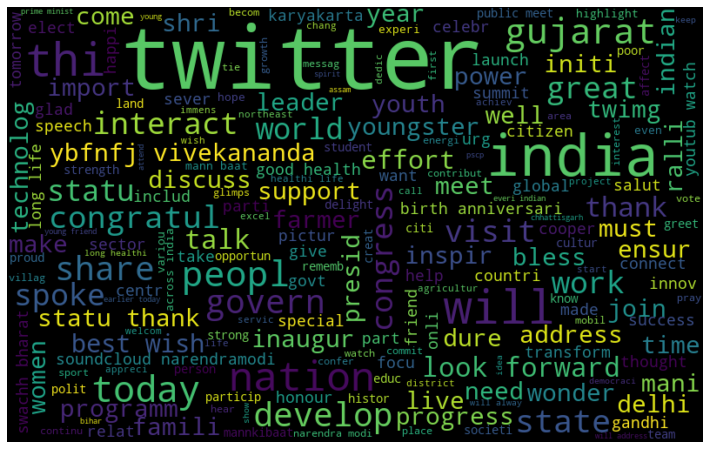

In [12]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()